### 4.10 Instacard Data Analysis

#### Contents
Importing libraries & data
Dropping PII information
Region llags and analysis
Customer profiling
Visualizations
Customer profile aggregates
Customer and regional comparison and visualization

### Step 1

### Importing libraries and data

In [1]:
# libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# data
path = r'/Users/jennyfevik/Desktop/IC Basket Analysis'

In [4]:
ic_data = pd.read_pickle(os.path.join(path, 'Data', 'Prepared', 'ic_data.pkl'))

In [5]:
ic_data.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,user_frequency,first_name,last_name,Gender,STATE,Age,date_joined,number_dependants,fam_status,income
0,2539329.0,1.0,1.0,2.0,8.0,NaN,196,1.0,0.0,both,...,NaN,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,both,...,Non-frequent,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0
2,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,both,...,Frequent customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0
4,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0


### Step 2

Data incldues identifier data such as names, checked with stateholders and determiend data should be dropped

In [6]:
# Dropping first name
ic_data = ic_data.drop(columns = ['first_name'])

In [7]:
# dropping last name
ic_data = ic_data.drop(columns = ['last_name'])

In [8]:
ic_data.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,user_spending,median_days_since_order,user_frequency,Gender,STATE,Age,date_joined,number_dependants,fam_status,income
0,2539329.0,1.0,1.0,2.0,8.0,NaN,196,1.0,0.0,both,...,NaN,NaN,NaN,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,both,...,Low spender,20.5,Non-frequent,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0
2,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,both,...,Low spender,13.0,Regular customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,both,...,Low spender,10.0,Frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0
4,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,both,...,Low spender,20.0,Regular customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0


No additional PII issues identified

### Step 3

### Creating region flag

In [9]:
# region groups
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [10]:
Northeast

['Maine',
 'New Hampshire',
 'Vermont',
 'Massachusetts',
 'Rhode Island',
 'Connecticut',
 'New York',
 'Pennsylvania',
 'New Jersey']

In [11]:
Midwest

['Wisconsin',
 'Michigan',
 'Illinois',
 'Indiana',
 'Ohio',
 'North Dakota',
 'South Dakota',
 'Nebraska',
 'Kansas',
 'Minnesota',
 'Iowa',
 'Missouri']

In [12]:
South

['Delaware',
 'Maryland',
 'District of Columbia',
 'Virginia',
 'West Virginia',
 'North Carolina',
 'South Carolina',
 'Georgia',
 'Florida',
 'Kentucky',
 'Tennessee',
 'Mississippi',
 'Alabama',
 'Oklahoma',
 'Texas',
 'Arkansas',
 'Louisiana']

In [13]:
West

['Idaho',
 'Montana',
 'Wyoming',
 'Nevada',
 'Utah',
 'Colorado',
 'Arizona',
 'New Mexico',
 'Alaska',
 'Washington',
 'Oregon',
 'California',
 'Hawaii']

In [14]:
# creating region flag
ic_data.loc[ic_data['STATE'].isin(Northeast), 'Region'] = 'Northeast'
ic_data.loc[ic_data['STATE'].isin(Midwest), 'Region'] = 'Midwest'
ic_data.loc[ic_data['STATE'].isin(South), 'Region'] = 'South'
ic_data.loc[ic_data['STATE'].isin(West), 'Region'] = 'West'

In [15]:
ic_data['Region'].value_counts(dropna = False)

South        10801982
West          8300617
Midwest       7604016
Northeast     5728444
NaN                11
Name: Region, dtype: int64

In [16]:
# Finding missing values
nan = ic_data[ic_data['Region'].isnull() == True]

In [17]:
nan

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,median_days_since_order,user_frequency,Gender,STATE,Age,date_joined,number_dependants,fam_status,income,Region
32435059,NaN,NaN,NaN,NaN,NaN,NaN,3630,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32435060,NaN,NaN,NaN,NaN,NaN,NaN,3718,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32435061,NaN,NaN,NaN,NaN,NaN,NaN,7045,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32435062,NaN,NaN,NaN,NaN,NaN,NaN,25383,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32435063,NaN,NaN,NaN,NaN,NaN,NaN,27499,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32435064,NaN,NaN,NaN,NaN,NaN,NaN,36233,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32435065,NaN,NaN,NaN,NaN,NaN,NaN,37703,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32435066,NaN,NaN,NaN,NaN,NaN,NaN,43725,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32435067,NaN,NaN,NaN,NaN,NaN,NaN,45971,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32435068,NaN,NaN,NaN,NaN,NaN,NaN,46625,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# dropping NaN rows
ic_data.dropna(subset = ['Region'], inplace = True)

In [19]:
ic_data['Region'].value_counts(dropna=False)

South        10801982
West          8300617
Midwest       7604016
Northeast     5728444
Name: Region, dtype: int64

### Comparing regional purchasing

In [21]:
# creating crosstab
crosstab = pd.crosstab(ic_data ['Region'], ic_data['user_spending'], dropna = False)

In [22]:
crosstab

user_spending,High spender,Low spender
Region,,
Midwest,1269,47412
Northeast,915,35138
South,1787,66232
West,1386,52070


In [23]:
# copy to Excel
crosstab.to_clipboard()

### Step 4

## Exclusion flag for low orders

In [24]:
ic_data['max_order'].head()

0    10.0
1    10.0
2    10.0
3    10.0
4    10.0
Name: max_order, dtype: float64

In [25]:
# creating subset for orders greater than 5
ic_data_max = ic_data[ic_data['max_order']>5]

In [26]:
ic_data_max.shape

(30199644, 32)

In [27]:
ic_data.shape

(32435059, 32)

In [29]:
#exporting subset
ic_data_max.to_pickle(os.path.join(path, 'Data','Prepared', 'ic_data_order_over_5.pkl'))

### Step 5

### Customer Profiling

In [30]:
# Age profiling
ic_data['Age'].describe()

count    3.243506e+07
mean     4.946512e+01
std      1.848555e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [31]:
# Age group flags
ic_data.loc[ic_data['Age']>= 65, 'age_group'] = 'Senior'

In [32]:
ic_data.loc[(ic_data['Age'] < 65) & (ic_data['Age'] >= 35), 'age_group'] = 'Middle Age'

In [33]:
ic_data.loc[ic_data['Age'] <35, 'age_group'] = 'Young Adult'

In [34]:
ic_data['age_group'].value_counts(dropna = False)

Middle Age     15216519
Young Adult     8635731
Senior          8582809
Name: age_group, dtype: int64

In [35]:
# income profiling
ic_data['income'].describe()

count    3.243506e+07
mean     9.943550e+04
std      4.305540e+04
min      2.590300e+04
25%      6.700200e+04
50%      9.661200e+04
75%      1.279080e+05
max      5.939010e+05
Name: income, dtype: float64

In [36]:
# income flags
ic_data.loc[ic_data['income'] <70000, 'income_bracket'] = 'Lower income'

In [37]:
ic_data.loc[(ic_data['income'] >=70000) & (ic_data['income'] < 125000), 'income_bracket'] = 'Middle income'

In [38]:
ic_data.loc[ic_data['income'] >= 125000, 'income_bracket'] = 'Higher income'

In [39]:
ic_data['income_bracket'].value_counts(dropna = False)

Middle income    14791741
Lower income      9004620
Higher income     8638698
Name: income_bracket, dtype: int64

In [41]:
# dependant no dependant flag
ic_data.loc[ic_data['number_dependants'] == 0, 'dependants'] = 'No Dependants'

In [42]:
ic_data.loc[ic_data['number_dependants'] >= 1, 'dependants'] = 'Has Dependants'

In [43]:
ic_data['dependants'].value_counts()

Has Dependants    24329714
No Dependants      8105345
Name: dependants, dtype: int64

### Step 6

### Visualizations

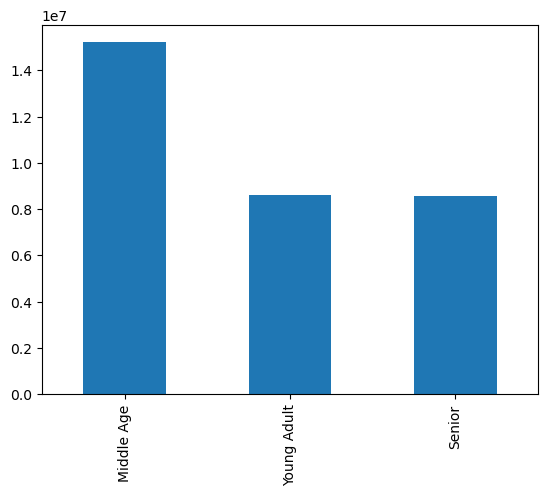

In [44]:
# bar chart for age
bar_age = ic_data['age_group'].value_counts().plot.bar()

In [45]:
# exporting bar chart
bar_age.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_age.png'))

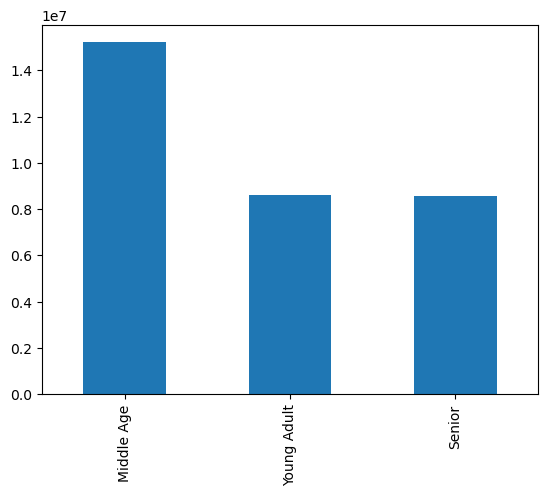

In [46]:
# bar chart for income
bar_income = ic_data['income_bracket'].value_counts().plot.bar()

In [47]:
bar_income.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_income.png'))

### Department Info

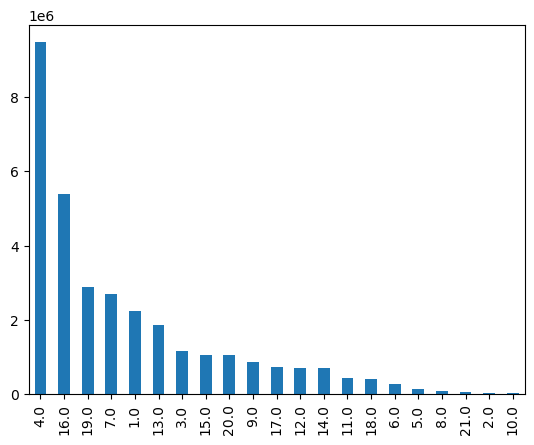

In [48]:
# department_id purchases
bar_dept = ic_data['department_id'].value_counts().plot.bar()

In [49]:
# giving names to id numbers
department_names = {1: 'Frozen', 2: 'Other', 3: 'Bakery', 4: 'Produce',5: 'Alcohol', 6: 'International',7: 'Beverages', 8:'Pets',9:'Dry Goods Pasta',10: 'Bulk', 11: 'Personal Care', 12: 'Meat/Seafood', 13: 'Pantry', 14: 'Breakfast',15:'Canned Goods', 16: 'Dairy/Eggs', 17: 'Household', 18: ' Babies', 19:'Snacks',20:'Deli',21:'Missing'}

In [50]:
# df for counts
department_counts = ic_data['department_id'].value_counts()

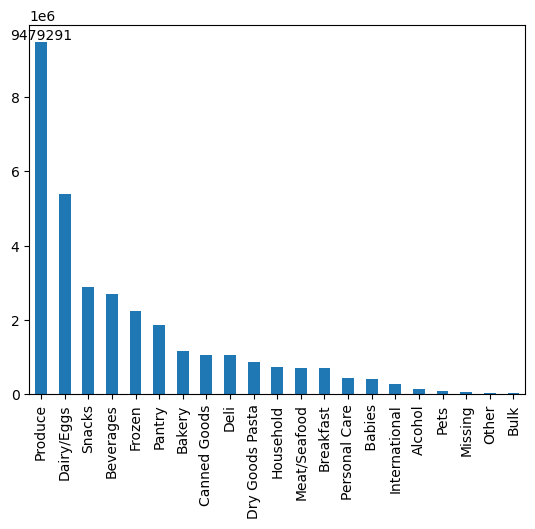

In [51]:
ax = department_counts.plot.bar()
ax.set_xticklabels([department_names.get(x, '') for x in department_counts.index])
for i, v in enumerate(department_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
    plt.show()

In [52]:
# exporting bar chart
ax.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_dept.png'))

In [53]:
# grouping for age and department
age_department_counts = ic_data.groupby(['department_id','age_group']).size().unstack(fill_value=0)

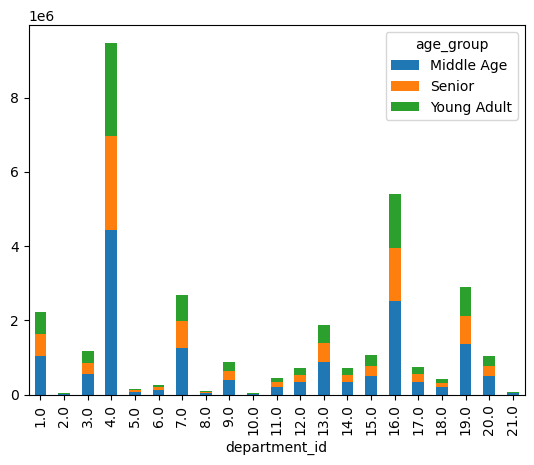

In [54]:
# bar chart of age and department id
bar_age_department = age_department_counts.plot.bar(stacked=True)

In [55]:
# exporting chart
bar_age_department.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_age_department.png'))

In [56]:
# grouping for department and income
department_income_counts = ic_data.groupby(['department_id','income_bracket']).size().unstack(fill_value=0)

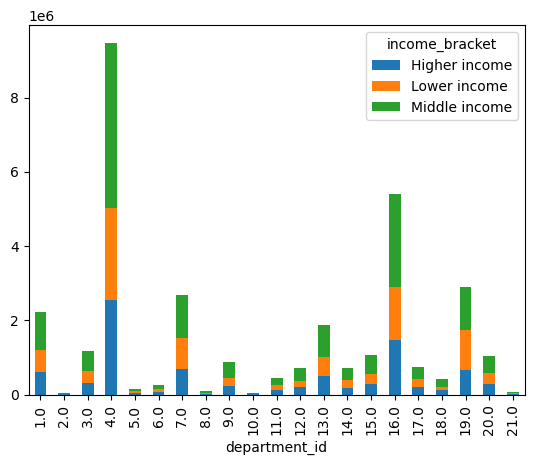

In [58]:
# bar chart
bar_depart_income = department_income_counts.plot.bar(stacked=True)

In [59]:
# exporting chart
bar_depart_income.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_depart_income.png'))

### Family info

In [60]:
# grouping fam status and income
fam_income_counts = ic_data.groupby(['fam_status','income_bracket']).size().unstack(fill_value=0)

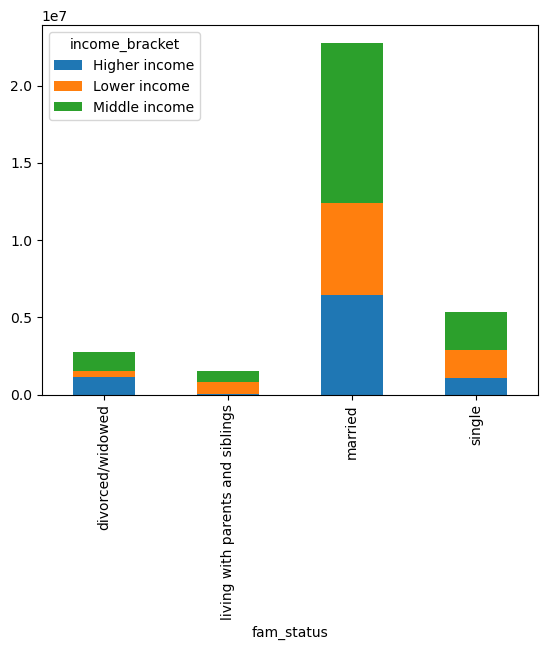

In [62]:
# Bar chart for fam status and income
fam_income_counts = fam_income_counts.plot.bar(stacked=True )

In [63]:
# exporting fam income chart
fam_income_counts.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'fam_income.png'))

In [64]:
# grouping fam status and age group
fam_age_counts = ic_data.groupby(['fam_status','age_group']).size().unstack(fill_value=0)

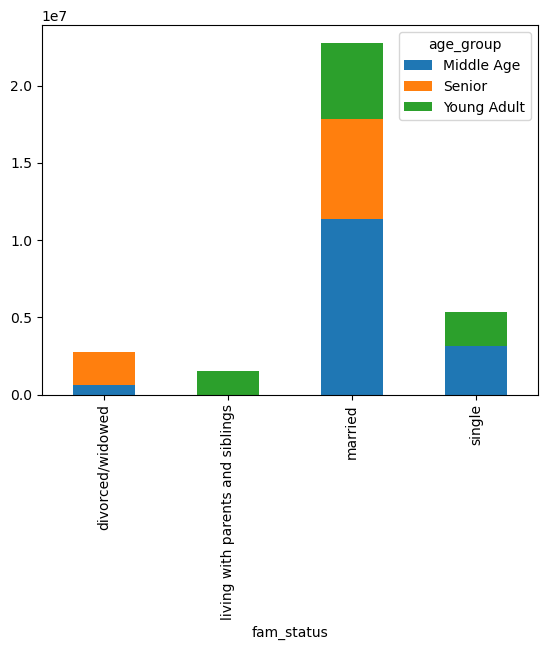

In [65]:
bar_fam_age = fam_age_counts.sort_index().plot.bar(stacked=True )

In [66]:
# exporting bar chart
bar_fam_age.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_fam_age.png'))

In [68]:
# grouping fam status and dependants
fam_depend_counts = ic_data.groupby(['fam_status','dependants']).size().unstack(fill_value=0)

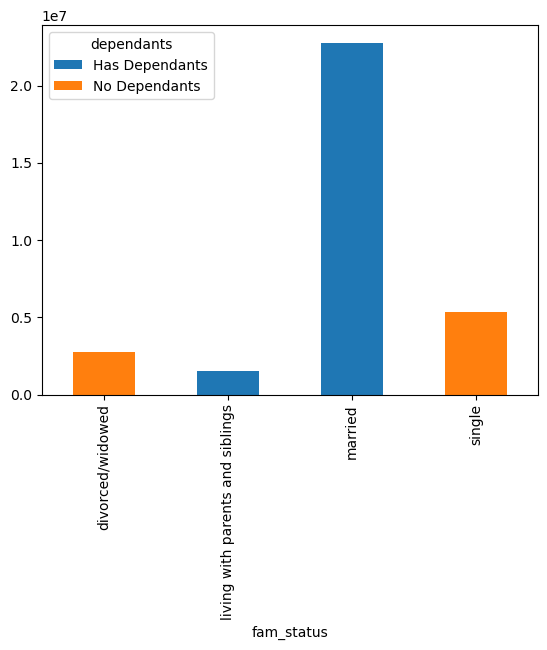

In [69]:
# bar chart for fam status and dependants
bar_fam_depend = fam_depend_counts.sort_index().plot.bar(stacked=True )

In [70]:
# exporting bar chart
bar_fam_depend.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_fam_dept'))

### Step 7

### Aggregations

In [71]:
# age and spending aggregations
ic_data.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
Middle Age   7.790860  1.0  25.0
Senior       7.796546  1.0  25.0
Young Adult  7.785713  1.0  25.0

In [72]:
# income and spending aggregations
ic_data.groupby('income_bracket').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
income_bracket                     
Higher income   7.957172  1.0  25.0
Lower income    7.349622  1.0  25.0
Middle income   7.962668  1.0  25.0

In [73]:
# dependants and spending aggregations
ic_data.groupby('dependants').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
dependants                         
Has Dependants  7.791334  1.0  25.0
No Dependants   7.789975  1.0  25.0

In [74]:
# fam status and spending
ic_data.groupby('fam_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                                      mean  min   max
fam_status                                           
divorced/widowed                  7.800975  1.0  25.0
living with parents and siblings  7.800712  1.0  25.0
married                           7.790695  1.0  25.0
single                            7.784249  1.0  25.0

In [75]:
# age and frequency
ic_data.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
age_group                                    
Middle Age               11.109019  0.0  30.0
Senior                   11.078983  0.0  30.0
Young Adult              11.120526  0.0  30.0

In [77]:
# income and frequency
ic_data.groupby('income_bracket').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                 mean  min   max
income_bracket                                  
Higher income               11.024041  0.0  30.0
Lower income                11.282190  0.0  30.0
Middle income               11.043046  0.0  30.0

In [79]:
# dependants and frequency
ic_data.groupby('dependants').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                 mean  min   max
dependants                                      
Has Dependants              11.111977  0.0  30.0
No Dependants               11.080597  0.0  30.0

In [80]:
# fam status and frequency
ic_data.groupby('fam_status').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                                   mean  min   max
fam_status                                                        
divorced/widowed                              11.048043  0.0  30.0
living with parents and siblings              11.047913  0.0  30.0
married                                       11.116346  0.0  30.0
single                                        11.097539  0.0  30.0

### Step 8

### Regional Data

In [81]:
# grouping region and ages
region_age_counts = ic_data.groupby(['Region','age_group']).size().unstack(fill_value=0)

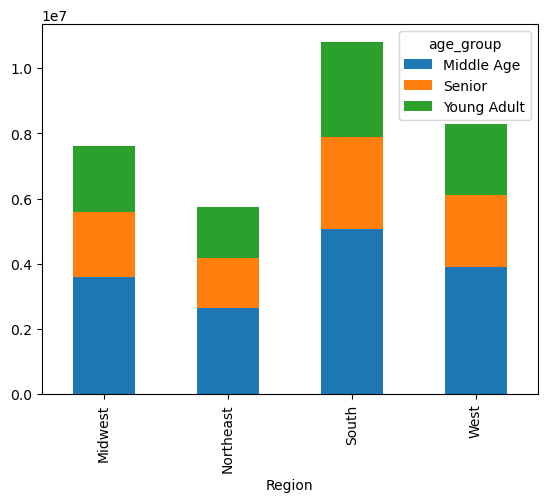

In [82]:
# bar chart for region and ages
region_age = region_age_counts.sort_index().plot.bar(stacked=True )

In [83]:
# exporting region and age bar chart
region_age.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_region_age.png'))

In [84]:
# grouping fam status and region
fam_region_counts = ic_data.groupby(['Region','fam_status']).size().unstack(fill_value=0)

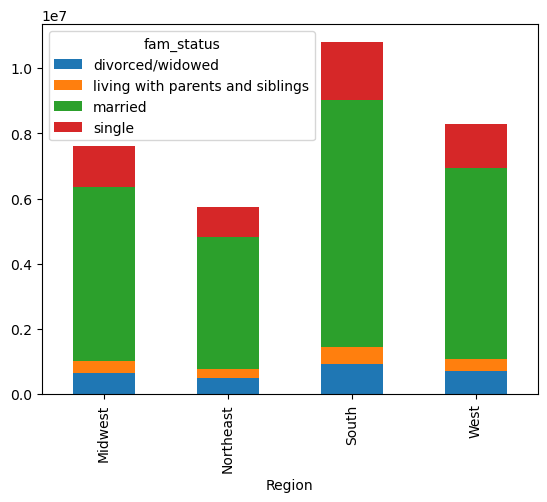

In [85]:
# bar chart for fam status and region
bar_fam_region = fam_region_counts.sort_index().plot.bar(stacked=True)

In [86]:
# exporting fam status region chart
bar_fam_region.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_fam_region.png'))

In [89]:
# grouping region and income
region_income_counts = ic_data.groupby(['Region','income_bracket']).size().unstack(fill_value=0)

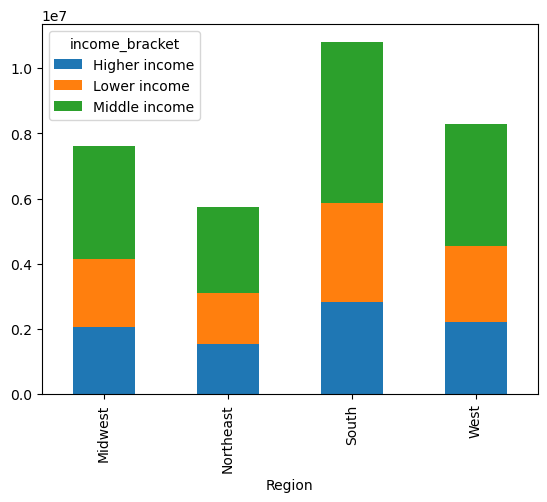

In [90]:
# bar chart for region and income
bar_region_income = region_income_counts.sort_index().plot.bar(stacked=True)

In [91]:
# exporting bar chart
bar_region_income.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_region_income.png'))

In [92]:
# grouping for region and dependants
region_depend_counts = ic_data.groupby(['Region', 'dependants']).size().unstack(fill_value=0)

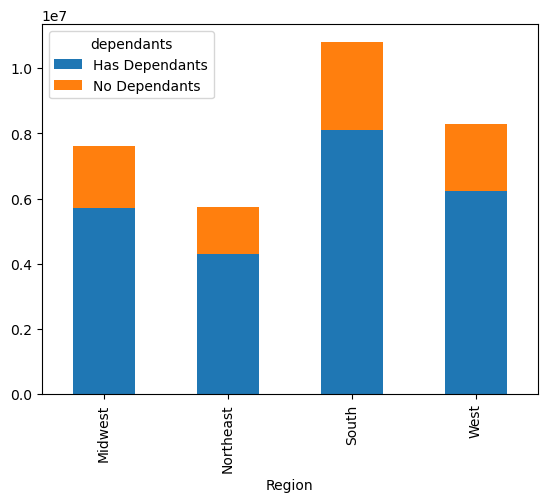

In [93]:
# bar chart for region and dependants
bar_region_depend = region_depend_counts.sort_index().plot.bar(stacked=True)

In [94]:
# exporting bar chart
bar_region_depend.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_region_dependants.png'))

In [96]:
# exporting data
ic_data.to_pickle(os.path.join(path, 'Data','Prepared', 'ic_data_final.pkl'))